## Exercise 1: Exploring Movie Recommendation Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Reading the required data file
data_frame = pd.read_csv('Downloads/ml-100k/u.data',names = ['user-id','item-id','rating','timestamp'] , delimiter="\t")



In [3]:
data_frame

,user-id,item-id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


### 1) Showcase how the ratings vary across users, as an example consider whether the plot is able to tell if most ratings are only from a handful of users.


In [4]:
#To find the no of ratings done by each user
y = data_frame.groupby("user-id")["rating"].count()
y

y.values.mean()

106.04453870625663

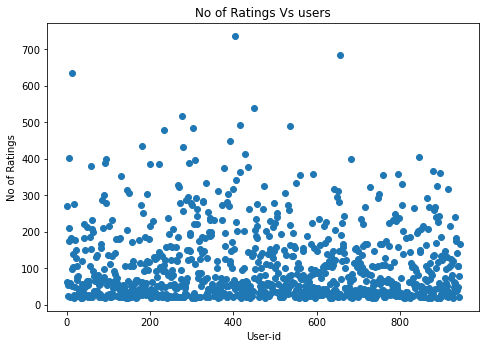

In [5]:
#Code to plot the graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('No of Ratings')
ax.set_xlabel('User-id')
ax.set_title('No of Ratings Vs users')
ax.scatter(y.index,y.values) 
plt.show()

We observe that most of the users only have done 100-200 ratings. Only very few users have done more than 500 ratings.
Thus out of 100k ratings, 3 users have more than 600 ratings each. 

### 2) Showcase how the ratings vary across items.

In [6]:
#To find the mean rating got by each movie
y2 = data_frame.groupby("item-id")["rating"].mean()
print(y2)
y_a = data_frame.groupby("item-id")["rating"].count() #to find the no of ratings recieved by each movie
print(y_a)

item-id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64
item-id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64


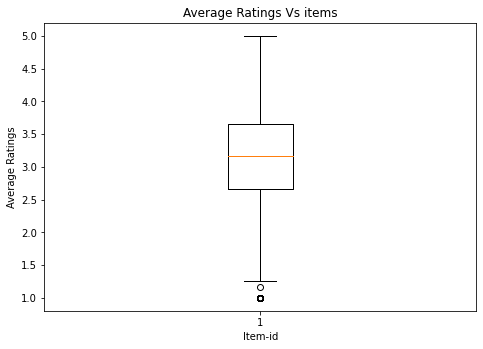

In [7]:
#Plotting the same 
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.set_ylabel('Average Ratings')
ax.set_xlabel('Item-id')
ax.set_title('Average Ratings Vs items')
ax.boxplot(y2.values) 
plt.show()


From this graph we see that most of the items have rating around 3, while very less movies have rating of 1 or 5. 

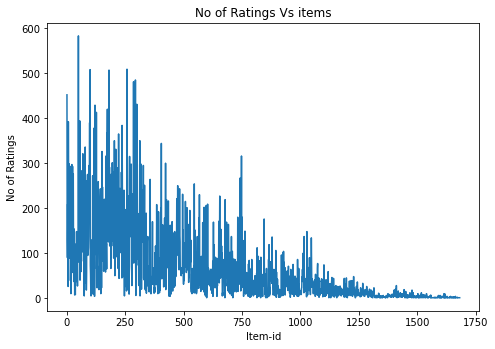

In [8]:
fig = plt.figure()
ax1= fig.add_axes([0,0,1,1])
ax1.set_ylabel('No of Ratings')
ax1.set_xlabel('Item-id')
ax1.set_title('No of Ratings Vs items')
ax1.plot(y_a.index,y_a.values) 
plt.show()

The graph represents how many ratings each movie got. We see that some movies have got more than 300 ratings while most of the movies have rating <100. 

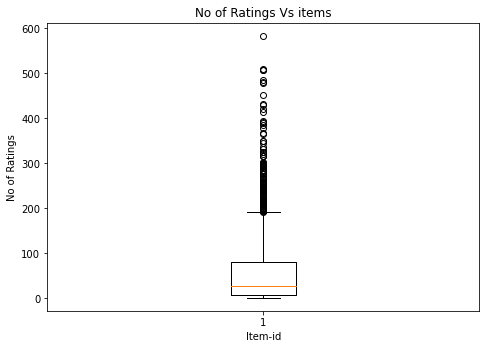

In [9]:
#Plotting the same usinh box plot as well
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('No of Ratings')
ax.set_xlabel('Item-id')
ax.set_title('No of Ratings Vs items')
ax.boxplot(y_a.values) 
plt.show() 

#We see that most movies have rating <100. Box plot is more useful to display this information

### 3) Are there genres that are more highly rated than others

In [10]:
#Reading the item file which has information about each movie
item_frame = pd.read_csv('Downloads/ml-100k/u.item',names = ["item-id", "movie title" ,"release date"," video release date",
              "IMDb URL ","unknown","Action"," Adventure","Animation",
              "Children's","Comedy","Crime","Documentary","Drama", "Fantasy",
              "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
              "Thriller","War","Western"], delimiter='|')

In [11]:
item_frame

,item-id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Reading the genre file which has the list  of genre.
genre_frame = pd.read_csv("Downloads/ml-100k/u.genre",delimiter = "|",)

In [13]:
genre_frame

,unknown,0
0,Action,1
1,Adventure,2
2,Animation,3
3,Children's,4
4,Comedy,5
5,Crime,6
6,Documentary,7
7,Drama,8
8,Fantasy,9
9,Film-Noir,10


In [14]:
#merging the item file and the ratings of each movie as we need genre of each film rated by the users
merge_frame = item_frame.join(y2, on='item-id') #item-id is the common attribute
merge_frame

,item-id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.878319
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.550239
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3.000000
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.000000
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.000000


In [15]:
#Dropping unwanted columns. We only require genres and the rating columns
new_frame = merge_frame.drop(["item-id","movie title" ,"release date"," video release date",
              "IMDb URL "],axis=1)
new_frame

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000


In [16]:
new_frame.columns

columns = list(new_frame) #getting the list of columns in data frame
print(columns)
for row in range(1682): #for each row
    for i in columns: #for each genre
        
        if(new_frame[i][row]==1): #if the movie is in that genre, then replacing the genre with the rating value
            new_frame[i][row] = pd.to_numeric(new_frame[i][row])
            new_frame[i][row] = new_frame["rating"][row]
            
new_frame

['unknown', 'Action', ' Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'rating']


<ipython-input-16-1762c89175d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame[i][row] = pd.to_numeric(new_frame[i][row])
<ipython-input-16-1762c89175d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame[i][row] = new_frame["rating"][row]


,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319
1,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3.206107
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3.033333
3,0,3,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,3.550239
4,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,3,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,3.000000
1679,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,2.000000
1680,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000


In [17]:
new_frame = new_frame.drop(["rating"],axis=1) #dropping rating column, to get data_frame with only genre




In [18]:
new_frame = new_frame.replace(0, np.NaN) #removing all zeroes
y4 = new_frame.mean() #finding mean of each genre column will give the average rating got by each genre
y4

unknown        2.000000
Action         2.525896
 Adventure     2.696296
Animation      2.738095
Children's     2.418033
Comedy         2.554455
Crime          2.834862
Documentary    2.920000
Drama          2.786207
Fantasy        2.318182
Film-Noir      3.250000
Horror         2.293478
Musical        2.821429
Mystery        2.934426
Romance        2.813765
Sci-Fi         2.663366
Thriller       2.721116
War            3.070423
Western        2.666667
dtype: float64

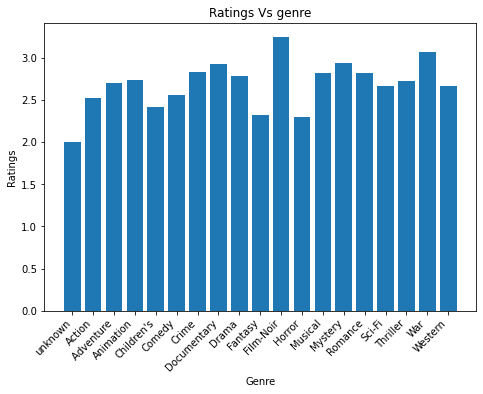

In [19]:
#Plotting the ratings recieved by each genre
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre')
ax.set_title('Ratings Vs genre')
ax.bar(y4.index,y4.values) 
plt.show()

We observe that The genre with the highest average ratimg pf almost 4 is Film Noir. The Genre with the lowest rating is Horror.

In [20]:
y5 = new_frame.count() #To find the no of ratings got for each genre
y5

unknown          2
Action         251
 Adventure     135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

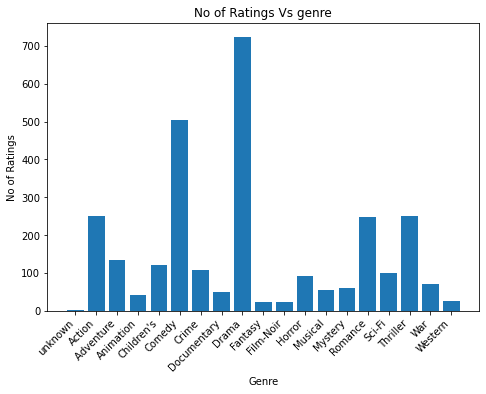

In [21]:
#Plotting the same
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('No of Ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre')
ax.set_title('No of Ratings Vs genre')
ax.bar(y5.index,y5.values) 
plt.show()

We observe that the movies of Drame genre are the ones which were rated the most number of times. The Genre with the least number of ratings is Fantasy. 

Thus from the above two graphs we can see that even though Film Noir has the highest average rating value, it was the genre which had less no of ratings.

### 4) What age groups prefer what genres based on ratings? You can bin respective ages to your preference.

In [22]:
#Reading the file with user information
user_frame = pd.read_csv("Downloads/ml-100k/u.user",names = ["user-id","age","gender","occupation","zipcode"],delimiter = "|",)



In [23]:
user_frame

,user-id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [24]:
#Combining the data file and user file as we need ratings of users based on age
new_merge = pd.merge(data_frame,user_frame, on="user-id") #user-id is the common attribute

In [25]:
new_merge = new_merge.sort_values(by="user-id")

In [26]:
#Combing the item data frame also as we need the ratings of each genre also
new_merge1 = new_merge.merge(item_frame, on="item-id")

new_merge1


,user-id,item-id,rating,timestamp,age,gender,occupation,zipcode,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,61,4,878542420,24,M,technician,85711,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,61,4,882140552,47,M,educator,29206,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,61,4,880130803,35,F,other,37212,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,61,5,884305271,27,M,programmer,52246,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,61,4,888204597,49,M,educator,08403,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1678,1,889289570,17,M,student,60089,Mat' i syn (1997),06-Feb-1998,...,0,0,0,0,0,0,0,0,0,0
99996,863,1679,3,889289491,17,M,student,60089,B. Monkey (1998),06-Feb-1998,...,0,0,0,0,0,1,0,1,0,0
99997,863,1680,2,889289570,17,M,student,60089,Sliding Doors (1998),01-Jan-1998,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,91505,You So Crazy (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Dropping unwanted columns
new_merge1 = new_merge1.drop(["user-id","item-id","timestamp","gender","occupation","zipcode","movie title"," video release date","release date","IMDb URL "],axis=1)
new_merge1


,rating,age,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,3,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99997,2,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,3,28,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Now we have frame with genre, ratings and age of users. Now we sort the data frame by age
new_merge2 = new_merge1.sort_values(by="age")
new_merge2

,rating,age,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
48819,4,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9038,4,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
43928,2,7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
87893,1,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14296,4,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23790,5,73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
70844,4,73,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23542,4,73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14966,3,73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We see that the age of people who have rated movies range from 7 to 73

In [29]:
columns = list(new_merge2) #getting the list of columns in the required data frame
print(columns)
for row in range(100000): #iterating through each row
    for i in columns: #iterating through each genre
        
        if(new_merge2[i][row]==1):  #if the movie belongs to that genre then, replace genre value with the rating
            new_merge2[i][row] = pd.to_numeric(new_merge2[i][row])
            new_merge2[i][row] = new_merge2["rating"][row]
            
new_merge2

['rating', 'age', 'unknown', 'Action', ' Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


,rating,age,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
48819,4,7,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
9038,4,7,0,0,0,0,0,4,0,0,...,0,0,0,0,0,4,0,0,0,0
43928,2,7,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
87893,1,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14296,4,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23790,5,73,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
70844,4,73,0,0,0,4,4,0,0,0,...,0,0,0,4,0,0,0,0,0,0
23542,4,73,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
14966,3,73,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
new_merge2 = new_merge2.drop(["rating"],axis=1) #dropping unwanted column and removing 0s
new_merge2 = new_merge2.replace(0, np.NaN)
new_merge2

,age,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
48819,7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9038,7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
43928,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
87893,7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
14296,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23790,73,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70844,73,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
23542,73,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14966,73,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
new_merge2.groupby("age").mean() #To get the mean of each genre rated by people in each age.

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
age,,,,,,,,,,,,,,,,,,,
7,NaN,3.611111,3.428571,4.000000,3.800000,3.736842,2.333333,NaN,3.916667,4.000000,NaN,NaN,3.333333,5.000000,3.916667,4.000000,3.444444,4.200000,5.0
10,NaN,4.000000,3.857143,2.687500,3.346154,4.416667,NaN,NaN,3.333333,NaN,NaN,NaN,2.111111,4.000000,4.000000,4.000000,NaN,3.500000,NaN
11,NaN,3.076923,2.625000,2.000000,2.000000,2.285714,2.500000,NaN,3.285714,NaN,NaN,NaN,1.000000,2.000000,3.000000,3.000000,3.500000,3.500000,NaN
13,NaN,3.493421,3.271429,3.529412,2.795455,3.181373,3.795918,3.0,3.854305,3.333333,4.0,3.619048,2.888889,3.916667,3.724638,3.600000,3.666667,3.900000,3.5
14,NaN,3.593220,3.829787,4.500000,3.360000,3.443038,3.466667,3.0,3.172414,2.777778,3.0,3.461538,3.772727,3.250000,3.382353,3.828571,3.382979,3.526316,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,3.000000,3.300000,3.000000,4.000000,3.000000,4.000000,NaN,3.500000,5.000000,NaN,1.000000,3.500000,NaN,3.000000,3.400000,3.000000,3.500000,NaN
68,NaN,3.166667,3.200000,2.000000,2.500000,3.333333,3.857143,3.5,3.660377,3.500000,4.0,3.000000,2.000000,3.800000,3.736842,3.444444,3.272727,3.600000,4.0
69,NaN,3.730769,3.818182,NaN,3.000000,3.358974,3.500000,3.0,3.752475,NaN,NaN,NaN,3.666667,4.142857,3.821429,2.833333,4.058824,3.750000,3.5


In [32]:
labels_age = ['children', 'youth', 'adults', 'seniors'] #the age classification
bins_age = [0, 19, 35, 60 ,100] #defining the ages for each class

new_merge2['age-group'] = pd.cut(new_merge2['age'], bins=bins_age, labels=labels_age) #adding a new column with age groups as values

new_merge3 = new_merge2.drop(["age"],axis=1) #dropping age colun as we have age group coulmn now
age_data = new_merge3.groupby('age-group').mean()
#computes the rating of each genre for each age group


age_data_count = new_merge3.groupby('age-group').count() #computes the no of ratings of each genre by age group


In [33]:

print(age_data.values[0])
print(age_data.columns)

[       nan 3.49489796 3.48006509 3.57291667 3.3296837  3.31185665
 3.63447251 3.87755102 3.68430461 3.12056738 3.68965517 3.50367647
 3.43548387 3.56377551 3.67303754 3.62203229 3.51503006 3.9005059
 3.63414634]
Index(['unknown', 'Action', ' Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [34]:
age_data

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
age-group,,,,,,,,,,,,,,,,,,,
children,NaN,3.494898,3.480065,3.572917,3.329684,3.311857,3.634473,3.877551,3.684305,3.120567,3.689655,3.503676,3.435484,3.563776,3.673038,3.622032,3.515030,3.900506,3.634146
youth,3.111111,3.448049,3.475245,3.594460,3.340999,3.369485,3.622146,3.648718,3.651045,3.108639,3.858960,3.252116,3.528612,3.555676,3.595590,3.532219,3.467913,3.762292,3.501916
adults,4.000000,3.539350,3.562324,3.538000,3.382497,3.459124,3.648284,3.688103,3.738608,3.417051,4.018373,3.300694,3.527295,3.759506,3.649888,3.602929,3.582600,3.881714,3.774963
seniors,NaN,3.561947,3.589286,3.631579,3.400000,3.475676,3.676471,3.000000,3.769352,3.769231,3.947368,3.120000,3.649123,3.788732,3.711538,3.564706,3.572727,3.784173,3.937500


In [35]:
age_data_count

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
age-group,,,,,,,,,,,,,,,,,,,
children,0,2352,1229,384,822,2623,673,49,2797,141,87,544,434,392,1465,1053,1996,593,123
youth,9,15476,8160,2202,4044,17408,4687,390,21828,764,865,3308,2796,2757,11021,7837,12840,5166,1044
adults,1,7535,4252,1000,2251,9431,2593,311,14637,434,762,1440,1667,2025,6715,3755,6816,3500,671
seniors,0,226,112,19,65,370,102,8,633,13,19,25,57,71,260,85,220,139,16


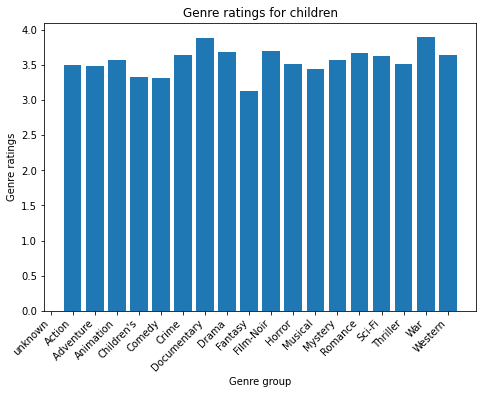

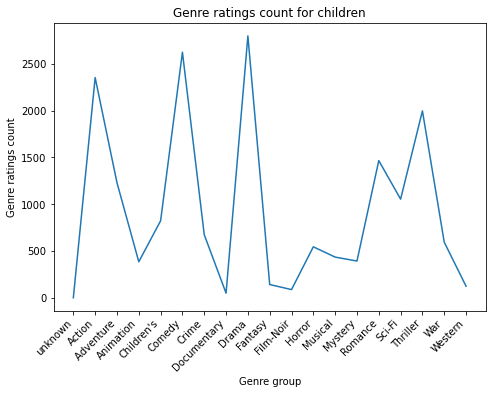

In [36]:
#Plotting the rating of each genre for age-group : children
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings for children')
ax.bar(age_data.columns,age_data.values[0]) 


plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings count')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings count for children')
ax.plot(age_data_count.columns,age_data_count.values[0]) 


plt.show()

We observe that children have rated the War genre the most average rating value.. while the Fantasy genre has got the least average rating.

We also see that children have rated more movies in in the Drame genre. They have rated the movies in Documentary genre the least

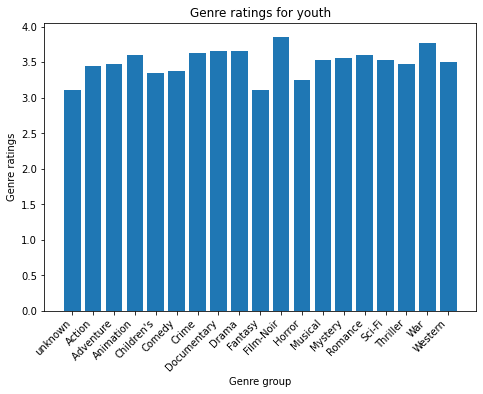

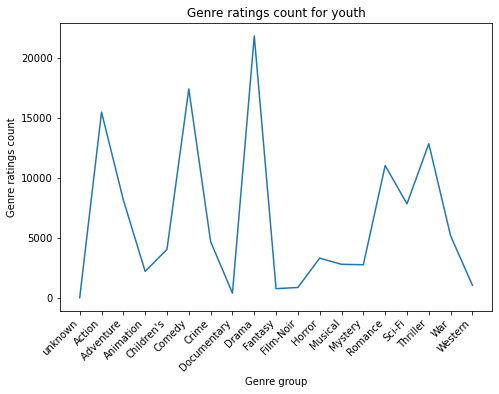

In [37]:
#Plotting the genre rating for age-group : youth

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings for youth')
ax.bar(age_data.columns,age_data.values[1]) 

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings count')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings count for youth')
ax.plot(age_data_count.columns,age_data_count.values[1]) 


plt.show()

From the graphs we can see that, youth have also rated more films in the Drama genre and rated the least films in Documentary genre which is similar to what we observed for children.

But for rating value, we see that they have given the highest ratings to movies of Film noir and the least to films of fantasy genre.

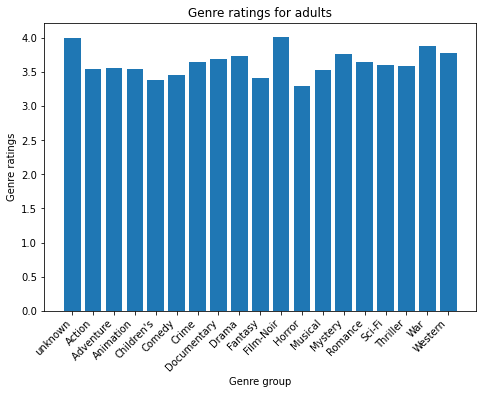

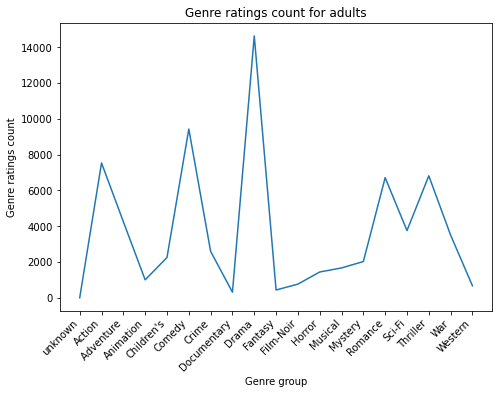

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings for adults')
ax.bar(age_data.columns,age_data.values[2]) 

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings count')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings count for adults')
ax.plot(age_data_count.columns,age_data_count.values[2]) 


plt.show()

We see that in the case of Adults, the movies which got the highest ratings were of the Film Noir, while those with least rating was from Horror. 

For the case of the no of ratings, most films rated by adults where from Drama genre and they rated the least number of films from Documentary which is similar to that observed for youth

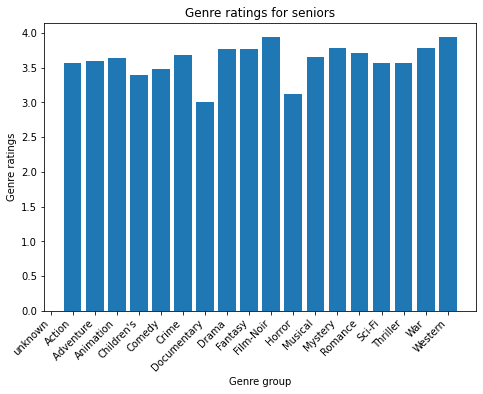

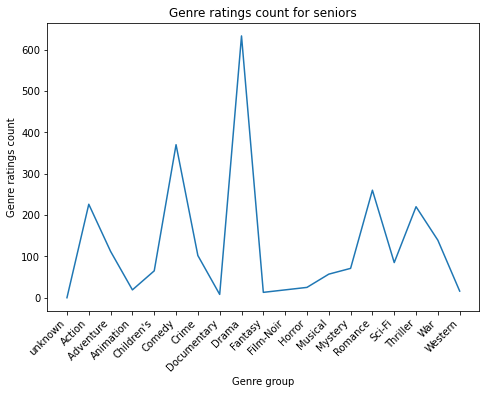

In [39]:
#Plotting graphs for genre ratings of the age group : senior citizens
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings for seniors')
ax.bar(age_data.columns,age_data.values[3]) 

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Genre ratings count')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Genre group')
ax.set_title('Genre ratings count for seniors')
ax.plot(age_data_count.columns,age_data_count.values[3]) 


plt.show()

We see that in the case of senior citizens also, most of the films rated are from Drama genre while films from Documentary where rated the least.

As for the case of the rating value, the highest rated films belong to Film Noir, while the least rated films belong to Documentary.

From the above graphs we can see that different age groups prefer different genres, but we can also observe similarities between all of them. Eg- most of the age groups prefer Drama genre, and the most uncommon genre is documentary and so on.

Thus from these graphs we can observe different trends.

In [40]:
data_frame = data_frame.drop(["timestamp"],axis=1)
data_frame.columns = ["user_id","item_id","rating"]
data_frame

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


## Exercise 2: Implementing basic matrix factorization (MF) technique for recommender systems

In [41]:
 def matrix_factorization(data, K, lr, lamda,  data_test, iterations):
    
    #creating ratings matrix by taking the user id and item id as the row and columns and values in each cell as ratings
    
    R = data.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0).values   
    
    
    R_T = data_test.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0).values
    
    users, items = R.shape #no of rows - users, no of colums - movies
    
    P = np.random.normal(scale=1./K, size=(users, K)) #Initializing P and Q with K latent dimensions
    Q = np.random.normal(scale=1./K, size=(items, K))
    
    b_u = np.zeros(users) #Initializing the bias for user and items
    b_i = np.zeros(items)
    b = np.mean(R[np.where(R != 0)]) #getting the mean of all non zero ratings value
    
    samples = [                     #to get all the ratings
        (i, j, R[i, j])
        for i in range(users)
        for j in range(items)
        if R[i, j] > 0
    ]
    x1, y1 = R.nonzero()
    np.random.shuffle(samples)
    error = []
    

    
    for epoch in range(iterations): #For each iteration
        
        
        
        for i, j, r in samples: #For each rating value
            
            #Compute prediction and error according to the algorithm , adding bias also
            prediction = b + b_u[i] + b_i[j] + P[i, :].dot(Q[j, :].T)
            e = (r - prediction)

            # Updating the biases
            b_u[i] += lr * (e - lamda * b_u[i])
            b_i[j] += lr * (e - lamda * b_i[j])

            # Updatin user and item latent feature matrices P and Q according to algorithm
            P[i, :] += lr * (e * Q[j, :] - lamda * P[i,:])
            Q[j, :] += lr * (e * P[i, :] - lamda * Q[j,:])
        
        
        
        
        
        #getting the predicted value - bias + P.(Q.T)
        predicted = b + b_u[:,np.newaxis] + b_i[np.newaxis:,] + P.dot(Q.T)
        
        squared_error = 0
        count = 0
        for x, y in zip(x1, y1): 
            squared_error += ((R[x, y] - predicted[x, y])**2) #calculating error for each value in the matrix
            count += 1
            
        error.append(np.sqrt(squared_error/count)) #appending the rmse value
    
    return error

In [42]:
def three_fold_cross_validation(k_list,lr_list,lamba_list):
    cv_results = []
    #performing for each combination of the hyper parameters so as to get the best hyper parameters
    
    for k in k_list: #for each k value
        for lr in lr_list: #for each learning rate
            for l in lamba_list: #for each lambda value
                final_rmse = []
                for i in range(3): #3 fold cross validation
                    
                    #Data set already has files for cross validation 
                    train = pd.read_csv('Downloads/ml-100k/u'+str(i+1) +'.base', names=["user_id","item_id","rating","timestamp"],
                                        delimiter="\t", header=None)
                    test = pd.read_csv('Downloads/ml-100k/u'+str(i+1) +'.test', names=["user_id","item_id","rating","timestamp"],
                                       delimiter="\t", header=None)

                    #normalizing the data
                    train['rating'] = (train['rating'] - min(train['rating'])) / (max(train['rating']) - min(train['rating']))
                    test['rating'] = (test['rating'] - min(test['rating'])) / (max(test['rating']) - min(test['rating']))
                    
                    #Calling the matrix factorisation method for each training data and hyper params
                    rmse_train = matrix_factorization(train,k,lr,l,test,20)
                    final_rmse.append(rmse_train[19]) #appending the rmse value
                
                final_rmse_value = np.mean(final_rmse) #finding the mean rmse value of each fold
                cv_results.append((k,lr,l,final_rmse_value)) #appending the params and the error
    
    return cv_results

In [43]:
#Defining the parameter list for k, learning rate and lambda
k = [5,10,15]
lr = [0.001,0.0001]
lamba = [0.01,0.1]

#performing 3 fold cross validation to optimise the hyper parameters using rmse value
cv_results = three_fold_cross_validation(k,lr,lamba)
print(cv_results)

[(5, 0.001, 0.01, 0.21476456172401723), (5, 0.001, 0.1, 0.20932794317353767), (5, 0.0001, 0.01, 0.24062220801827364), (5, 0.0001, 0.1, 0.23839186869689077), (10, 0.001, 0.01, 0.20572775138088448), (10, 0.001, 0.1, 0.2054719645015213), (10, 0.0001, 0.01, 0.22665513665402603), (10, 0.0001, 0.1, 0.22655182556588635), (15, 0.001, 0.01, 0.2045753987167798), (15, 0.001, 0.1, 0.20504741180976047), (15, 0.0001, 0.01, 0.22513544070156746), (15, 0.0001, 0.1, 0.22524715295378359)]


In [44]:
#Finding the best hyper params

best_params=min(cv_results, key=lambda x:x[3])
print("The best hyper parameters with the least rmse value:",best_params)
print("\n The RMSE value-",best_params[3])

The best hyper parameters with the least rmse value: (15, 0.001, 0.01, 0.2045753987167798)

 The RMSE value- 0.2045753987167798


In [45]:
#Now doing the MF using the best params

train,val,test = np.split(data_frame.sample(frac=1,random_state=3116),[int(.8*len(data_frame)),int(.9*len(data_frame))])

test['rating'] = (test['rating'] - min(test['rating'])) / (max(test['rating']) - min(test['rating']))

#Calling the matrix factorization method and getting the RMSE value for the test data set 
rmse_test = matrix_factorization(test,best_params[0],best_params[1],best_params[2],test,20)


In [46]:
print("The RMSE value on the test data: ",np.mean(rmse_test))

The RMSE value on the test data:  0.22318080256351341


We observe that the test rmse is greater.

## Exercise 3: Recommender Systems using matrix factorization sckit- learn

Here I am going to implement the matrix factorisation method using NMF  from sklearn decomposition. NMF refres to non negative matrix factorisation model. 
Here we find two non-negative matrices (P, Q) whose product approximates the non- negative matrix R which is the rating matrix. 
This factorization is used for dimensionality reduction, source separation or topic extraction.

This is similar to what was done above without using sklearn. There also we predict values by optimising P and Q.

Here we pass the hyper parameters k, learning rate and lambda to the NMF function. 
The param n_components refer to the no of k values, alpha denotes the learning rate and l1_ratio denotes the regularization term. Here we use coordinate descent as the solver.

Once the model is defined, it is fitted with the Rating matriz and then new values can be predicted similar to how we did before i.e, P.Q

I selected this library as it functions similar to the matrix factorization algorithm. And hence can be easiliy implemented.



In [47]:
#importing NMF from sklearn
from sklearn.decomposition import NMF

In [48]:
#Function to implement NMF to predict the rating values

def sklearn_nmf(data, K, lr, lamda,  data_test, iterations):
    
    
    error = []
    #Creating the ratings matrix , similar to how we did before
    R = data.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0).values
    
    R_T = data_test.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0).values
    
    x1, y1 = R.nonzero()
    
    #Defining the model by passing the parameters
    model = NMF(n_components=K,solver='cd',alpha = lr,max_iter=iterations,l1_ratio=lamda,verbose=1)
    model.fit(R)                 #Fitting the model with the rating matrix
    P = model.transform(R)       # user features
    Q = model.components_.T       # item features
                 

    # Making the predictions
    R_pred = Q.dot(P.T).T
   
    squared_error = 0
    count = 0
    for x, y in zip(x1, y1): #Finding the error btw actual values and predicted values
        squared_error += ((R[x, y] - R_pred[x, y])**2)
        count += 1

    
    error.append(np.sqrt(squared_error/count))  
    
    return error

In [49]:
#Function to implement 3 fold cross validation

def three_fold_cross_validation_nmf(k_list,lr_list,lamba_list):
    cv_results = []
    
    #For each hyper parameter combination, perform cross validation
    for k in k_list: 
        for lr in lr_list:
            for l in lamba_list:
                final_rmse = []
                for i in range(3): # 3 fold
                    
                    #Getting the different train and test sets for cross validation as given in the data set
                    train = pd.read_csv('Downloads/ml-100k/u'+str(i+1) +'.base', names=["user_id","item_id","rating","timestamp"],
                                        delimiter="\t", header=None)
                    test = pd.read_csv('Downloads/ml-100k/u'+str(i+1) +'.test', names=["user_id","item_id","rating","timestamp"],
                                       delimiter="\t", header=None)

                    #normalizing data
                    train['rating'] = (train['rating'] - min(train['rating'])) / (max(train['rating']) - min(train['rating']))
                    test['rating'] = (test['rating'] - min(test['rating'])) / (max(test['rating']) - min(test['rating']))

                    #Calling the function to implement matrix factorisation
                    rmse_test = sklearn_nmf(train,k,lr,l,test,20)
                    final_rmse.append(rmse_test)
                
                #Finding the mean rmse value for each hyper param combination and appending the results
                mean_rmse_value = np.mean(final_rmse)
                cv_results.append((k,lr,l,mean_rmse_value))
    
    return cv_results

In [50]:
#Defining the parameter space for each hyper param

k = [5,10,15]
lr = [0.001,0.0001]
lamba = [0.01,0.1]
#Calling function to perform cross validation ( 3 fold)

cv_results_mf = three_fold_cross_validation_nmf(k,lr,lamba)
print(cv_results_mf)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4750666550692398
violation: 0.3806852788800416
violation: 0.30730164411208877
violation: 0.24256045259964112
violation: 0.18789669876400544
violation: 0.1466262459288716
violation: 0.11923507490471898
violation: 0.10013125777821759
violation: 0.0856337068318754
violation: 0.07591424007906833
violation: 0.06829215501918785
violation: 0.06261986825495394
violation: 0.0578271325392615
violation: 0.05334106278713031
violation: 0.04908507043898442
violation: 0.04521894687717385
violation: 0.04172714783969708
violation: 0.038454353027469024
violation: 0.0353192314700541
violation: 1.0
violation: 0.3453272709419039
violation: 0.0892045785974023
violation: 0.02676910797943976
violation: 0.006897186336443218
violation: 0.001696168396884968
violation: 0.0005844446287309574
violation: 0.00022677669416653273
violation: 8.020732347231638e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4879650384524126
violation: 0.3426614953971641
violation: 0.24900324771135926
violation: 0.1921582893136525
violation: 0.1552430445860889
violation: 0.12909886608410193
violation: 0.11096978742704934
violation: 0.09630842878137524
violation: 0.08489894875302018
violation: 0.07570684421852261
violation: 0.06760680754884763
violation: 0.061106257668583214
violation: 0.05548929440417031
violation: 0.050478761649764024
violation: 0.046034169391318304
violation: 0.04177738328295578
violation: 0.03789879663905069
violation: 0.0345002120365403
violation: 0.031217926726618335
violation: 1.0
violation: 0.3413976913596404
violation: 0.08171880975503507
violation: 0.023257870424941908
violation: 0.005725995327111602
violation: 0.0016186060280749624
violation: 0.0006101209717310637
violation: 0.00023126193624988268
violation: 8.457167187539866e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.48680365495284567
violation: 0.34948922889426165
violation: 0.2599863644313709
violation: 0.20537355044941766
violation: 0.16675905224172466
violation: 0.13866324487665443
violation: 0.12015051801922882
violation: 0.1081522359142038
violation: 0.10071292765532804
violation: 0.09510350917749127
violation: 0.09023984178248194
violation: 0.08520807972999786
violation: 0.07822135731869731
violation: 0.0713289467557049
violation: 0.06470030166965299
violation: 0.058634211489857126
violation: 0.05338484268855231
violation: 0.048813921582109766
violation: 0.044632215495759395
violation: 1.0
violation: 0.3367324572708008
violation: 0.07923587130571157
violation: 0.021871120198819906
violation: 0.005289444478653655
violation: 0.001572559690932145
violation: 0.0006062424543003544
violation: 0.00022442518561931112
violation: 8.159207755661402e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4750533689564873
violation: 0.38068249967997925
violation: 0.3072922991564516
violation: 0.2425547260901415
violation: 0.1878945613496174
violation: 0.14662074112145332
violation: 0.11923089031834562
violation: 0.10012884656548861
violation: 0.0856314847120564
violation: 0.07591355951224012
violation: 0.0682919009585651
violation: 0.06262099148632386
violation: 0.0578286002322941
violation: 0.05334311129721107
violation: 0.0490876149024674
violation: 0.04522167390879641
violation: 0.041729775591687224
violation: 0.03845705103067988
violation: 0.03532210012116889
violation: 1.0
violation: 0.34532159090021997
violation: 0.08920075281502038
violation: 0.02676689617542477
violation: 0.006896321884379404
violation: 0.0016959650631105465
violation: 0.0005843982256600593
violation: 0.00022675280178577432
violation: 8.019704338462317e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.48790817257146557
violation: 0.34263828370613925
violation: 0.24898827163131068
violation: 0.19214728332295516
violation: 0.1552345359877076
violation: 0.12909160020160523
violation: 0.11096386127117276
violation: 0.09630326084422704
violation: 0.08489420028289124
violation: 0.07570248124906809
violation: 0.06760289748054273
violation: 0.061102620326288735
violation: 0.05548585630317871
violation: 0.05047535304637002
violation: 0.0460311970109748
violation: 0.041774751097040576
violation: 0.03789402707090711
violation: 0.034498155251348375
violation: 0.0312160666153343
violation: 1.0
violation: 0.34139149137859043
violation: 0.0817154292922344
violation: 0.023256034133318042
violation: 0.005721608392416835
violation: 0.0016185117398705429
violation: 0.0006100940097097508
violation: 0.00023124263993664338
violation: 8.456285150996216e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4867946677299284
violation: 0.34948085205649065
violation: 0.25995912127494464
violation: 0.20536817600371862
violation: 0.16675628570142997
violation: 0.13866170417022802
violation: 0.12015678057167108
violation: 0.1081505827699818
violation: 0.10071090253054987
violation: 0.09510121044332484
violation: 0.0902377224355119
violation: 0.08520624589275066
violation: 0.07821979465755496
violation: 0.07132683871907837
violation: 0.0646992652634135
violation: 0.058633486057928
violation: 0.05338383419184416
violation: 0.04881384010581358
violation: 0.044632098773414765
violation: 1.0
violation: 0.33672670969945107
violation: 0.07923481840898695
violation: 0.02187093861452526
violation: 0.005289374813915203
violation: 0.0015724909308782434
violation: 0.0006062107431233264
violation: 0.00022441326096168257
violation: 8.158794635059315e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4751459323326302
violation: 0.3807459288762439
violation: 0.3073438557956927
violation: 0.24258799328659622
violation: 0.18791703600291934
violation: 0.14664169571081262
violation: 0.11924631660137874
violation: 0.10014264699052251
violation: 0.08564320142785276
violation: 0.07592348227020843
violation: 0.06830196446407207
violation: 0.06263038846822223
violation: 0.057837531584828475
violation: 0.05335172022847735
violation: 0.04909576025939378
violation: 0.045229363634686645
violation: 0.04173727978790858
violation: 0.038464786367331784
violation: 0.03532903698229927
violation: 1.0
violation: 0.3453224203299291
violation: 0.0891999202537583
violation: 0.026766852736056966
violation: 0.006896415933366636
violation: 0.0016959390718035807
violation: 0.0005843637156976563
violation: 0.00022674429673770916
violation: 8.019365721613478e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.487941240184473
violation: 0.34264833333180156
violation: 0.24899232961457332
violation: 0.19214946306845482
violation: 0.15523599995759768
violation: 0.12909332892388248
violation: 0.11096591204008635
violation: 0.09630422914454696
violation: 0.08489529866394287
violation: 0.07570339959663483
violation: 0.06760376838686502
violation: 0.06110369211518718
violation: 0.055487056188853905
violation: 0.05047692831407065
violation: 0.046032849799481565
violation: 0.04177651110576438
violation: 0.0378958561962432
violation: 0.034500404857310304
violation: 0.031218525175255953
violation: 1.0
violation: 0.34139742008343543
violation: 0.0817146899717608
violation: 0.023255699679319525
violation: 0.005725237921446898
violation: 0.0016184493690512142
violation: 0.0006100707916432538
violation: 0.0002312292467709105
violation: 8.45561672158859e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.48682620817600925
violation: 0.34951564460678475
violation: 0.25997624920588946
violation: 0.2053806702495924
violation: 0.16676687810238275
violation: 0.138671229920787
violation: 0.12016551500875221
violation: 0.10815764149750196
violation: 0.1007176302130771
violation: 0.09510718627028138
violation: 0.09024296629051773
violation: 0.08521059139893823
violation: 0.07822260855035366
violation: 0.07132986827800654
violation: 0.06470049491907721
violation: 0.05863477767107293
violation: 0.05338550489275605
violation: 0.04881453432959262
violation: 0.04463301657421247
violation: 1.0
violation: 0.33672636658051813
violation: 0.07923049328066861
violation: 0.021868700559217132
violation: 0.005288733841332931
violation: 0.0015724208783467369
violation: 0.0006061866552605997
violation: 0.00022439028403879797
violation: 8.157620732069363e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4750782652619716
violation: 0.3806941516868088
violation: 0.3073061700363607
violation: 0.242562549153801
violation: 0.18789824451224652
violation: 0.14662669515274698
violation: 0.11923534743479085
violation: 0.10013166303403735
violation: 0.08563351444350381
violation: 0.07591446335278816
violation: 0.06829337240424027
violation: 0.06262205541762401
violation: 0.05782957971297284
violation: 0.05334398420100974
violation: 0.0490883513834832
violation: 0.04522240798340626
violation: 0.041730745949338025
violation: 0.038458580507231596
violation: 0.035323151028077746
violation: 1.0
violation: 0.3453227960524509
violation: 0.08920027390331613
violation: 0.026766892413808543
violation: 0.006896385773054457
violation: 0.0016959494749766225
violation: 0.0005843787079997192
violation: 0.00022674787695794486
violation: 8.019502481023831e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.48793608910558445
violation: 0.34264178296739684
violation: 0.24899123654640454
violation: 0.19215025128398341
violation: 0.15523743876770252
violation: 0.12909456146129492
violation: 0.11096678464968197
violation: 0.09630515852420683
violation: 0.08489621654750856
violation: 0.07570441054326257
violation: 0.06760474835381476
violation: 0.06110457827616047
violation: 0.05548792368552215
violation: 0.050477818181518766
violation: 0.04603366706326414
violation: 0.041777317268591165
violation: 0.037896548523778134
violation: 0.0345010931711742
violation: 0.031219158448750933
violation: 1.0
violation: 0.3413971751447378
violation: 0.08171478851065728
violation: 0.023255800462611716
violation: 0.005725267165830572
violation: 0.0016184369656689582
violation: 0.0006100641164545812
violation: 0.0002312281148787466
violation: 8.455589931124341e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4868260233802572
violation: 0.3494968687720736
violation: 0.2599905955754316
violation: 0.20537654277299452
violation: 0.1667620181539614
violation: 0.1386657647867762
violation: 0.12016022368069375
violation: 0.10815319082362641
violation: 0.10071342901573002
violation: 0.09510351873878202
violation: 0.09024026571010171
violation: 0.08520889823095609
violation: 0.07822269786309978
violation: 0.07132962237649818
violation: 0.06470148054713006
violation: 0.058635511432167844
violation: 0.053386393213519255
violation: 0.048816002024200465
violation: 0.044634690185474765
violation: 1.0
violation: 0.33672790601150165
violation: 0.07923369004600248
violation: 0.021870922891813024
violation: 0.005289321950637162
violation: 0.0015724207702141329
violation: 0.0006061722996114053
violation: 0.00022439863331954918
violation: 8.158274416438153e-05
Converged at iteration 10


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.41356671312883336
violation: 0.33000246746465106
violation: 0.25450287636148483
violation: 0.19378104016707756
violation: 0.1515174114050897
violation: 0.12126374568601007
violation: 0.10120221413593587
violation: 0.0876534555522808
violation: 0.07733111964393499
violation: 0.068847434594959
violation: 0.06180448503334432
violation: 0.05606505234110667
violation: 0.0506950506904091
violation: 0.04599254817411153
violation: 0.041717721191719265
violation: 0.03787932976824273
violation: 0.03442190242971062
violation: 0.03147267791075932
violation: 0.029201844161466678
violation: 1.0
violation: 0.43618373700485596
violation: 0.1302406698244999
violation: 0.03720587212746824
violation: 0.01332844322946237
violation: 0.006294744501998329
violation: 0.002938148517059378
violation: 0.0011483833142838565
violation: 0.0003883568386428644
violation: 0.00018869203795581947
violation: 0.00010046247680955824
violation: 4.7153563768887985e-05
Converged at iteration 13


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4247737944152604
violation: 0.29508256169333
violation: 0.2030563956648207
violation: 0.14846418062623282
violation: 0.11562976023346759
violation: 0.09440594161942668
violation: 0.07929163728208748
violation: 0.06793121396973031
violation: 0.05847840349299559
violation: 0.04978977339057197
violation: 0.04201358016926494
violation: 0.035438108049450426
violation: 0.029701785489987025
violation: 0.024913099237098113
violation: 0.020838901455174936
violation: 0.01762844127053042
violation: 0.015016989148156875
violation: 0.012876779691079945
violation: 0.011148613906804137
violation: 1.0
violation: 0.4449500887066366
violation: 0.12336713663793722
violation: 0.03079243852436262
violation: 0.011928974690928556
violation: 0.0058294258947134605
violation: 0.002432924484830091
violation: 0.0008581521923768652
violation: 0.0003070777849052454
violation: 0.00016501301578160615
violation: 8.064711549062795e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.44544983620899303
violation: 0.30890689549067124
violation: 0.2053519977958372
violation: 0.14806700678287127
violation: 0.11179597875033775
violation: 0.08915340374012629
violation: 0.07282318013993591
violation: 0.060323094963830856
violation: 0.050507110345336184
violation: 0.04249634787236791
violation: 0.035578953400712605
violation: 0.029643564882466816
violation: 0.025144131726366075
violation: 0.02155765370911706
violation: 0.01874853595640064
violation: 0.016596206785678223
violation: 0.01490470454398194
violation: 0.01357949182513125
violation: 0.012518591804849545
violation: 1.0
violation: 0.44424618359626034
violation: 0.12402513457818819
violation: 0.03168400655155881
violation: 0.010584915892897952
violation: 0.005192879429662411
violation: 0.0021981696005317756
violation: 0.0007992321495885651
violation: 0.00026620629796237987
violation: 0.00013260992130540022
violation: 6.667010917033352e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4135985109252106
violation: 0.3304671018806897
violation: 0.2544112759311739
violation: 0.1932208465742545
violation: 0.15090455790396792
violation: 0.12123299729471229
violation: 0.10136126326411271
violation: 0.08781364032470863
violation: 0.07757601423806296
violation: 0.06909274034751398
violation: 0.06206169460877616
violation: 0.05623561695355765
violation: 0.050990286434998464
violation: 0.04630478262859076
violation: 0.041976801322806935
violation: 0.03808573607789172
violation: 0.03466301004610197
violation: 0.031811334005502116
violation: 0.02965131409974018
violation: 1.0
violation: 0.43739050128760193
violation: 0.130271340580157
violation: 0.03740282648015602
violation: 0.013726305713854421
violation: 0.006466759479769471
violation: 0.0030147340286377617
violation: 0.0011731312064964187
violation: 0.00040277886448321425
violation: 0.00019965025783961674
violation: 0.00010581388692321453
violation: 4.9383217913452546e-05
Converged at iteration 13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.42443074957613897
violation: 0.2949035746099772
violation: 0.20305461366334587
violation: 0.14833181864912098
violation: 0.11556484027816626
violation: 0.09456063074503933
violation: 0.07968333548173089
violation: 0.06824868117676149
violation: 0.05888128003970184
violation: 0.050220913358215706
violation: 0.04241078088175193
violation: 0.03583862136884996
violation: 0.03004293561437949
violation: 0.02522750242123362
violation: 0.021108995481261682
violation: 0.01780768430761903
violation: 0.015148362077630225
violation: 0.012986917584526638
violation: 0.011224903680575288
violation: 1.0
violation: 0.44481190777660023
violation: 0.12335514623963083
violation: 0.03078496323116489
violation: 0.01192610151277427
violation: 0.005830937080049328
violation: 0.002433422828957433
violation: 0.0008589360932731875
violation: 0.0003070068025817786
violation: 0.00016504375959439912
violation: 8.07050480904684e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.44492305474163046
violation: 0.30933602212924316
violation: 0.20605849143828397
violation: 0.14850283386967317
violation: 0.11196136773689423
violation: 0.08929621685664525
violation: 0.07297260224410043
violation: 0.06050657362374758
violation: 0.050676230605952
violation: 0.04268143571244535
violation: 0.03581695993761203
violation: 0.02990775337913443
violation: 0.025353199954117247
violation: 0.021754176930067974
violation: 0.01893652440904099
violation: 0.016761881947970063
violation: 0.015054365372316577
violation: 0.01373075671840299
violation: 0.012652727842712333
violation: 1.0
violation: 0.4443075096210817
violation: 0.1241149420639554
violation: 0.03172713002948046
violation: 0.01059431757645243
violation: 0.005200105398745441
violation: 0.0022047565368670716
violation: 0.0008025263915792923
violation: 0.00026725127492745855
violation: 0.00013319547742809252
violation: 6.710706362984284e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.41413166756600805
violation: 0.33081620706805925
violation: 0.25429879608477635
violation: 0.19287913667475506
violation: 0.15044207448387945
violation: 0.12076212119485766
violation: 0.10086891848917418
violation: 0.08739804142639292
violation: 0.07712537307212597
violation: 0.06869366778281412
violation: 0.061758683738245584
violation: 0.05600239287811806
violation: 0.050757260368477906
violation: 0.04613622336509004
violation: 0.04190542703833653
violation: 0.03802669274486414
violation: 0.03466553952021748
violation: 0.03185975732758916
violation: 0.029708517067358088
violation: 1.0
violation: 0.437496999057832
violation: 0.13039656167896618
violation: 0.037493337208305166
violation: 0.013723293518607599
violation: 0.006481268381828907
violation: 0.0030227443790092697
violation: 0.0011742454259391893
violation: 0.0004016396024654103
violation: 0.00019889239832181015
violation: 0.0001054509779309632
violation: 4.919049083924821e-05
Converged at iteration 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.42517688979529394
violation: 0.29482904291690154
violation: 0.2028343024057947
violation: 0.14807036377319477
violation: 0.11533578208462901
violation: 0.09419593285738988
violation: 0.07896141154129854
violation: 0.06764648242572782
violation: 0.05822521448119839
violation: 0.049462904493362526
violation: 0.04179482268204589
violation: 0.03526821117082518
violation: 0.029552855151756135
violation: 0.02479967977332227
violation: 0.020755653831294518
violation: 0.017579995077046592
violation: 0.014986560027626276
violation: 0.01284839480489923
violation: 0.011136753144233492
violation: 1.0
violation: 0.4449196175654116
violation: 0.12331883516347356
violation: 0.030785270498701778
violation: 0.011940572539964537
violation: 0.005826419755635208
violation: 0.002432524374614696
violation: 0.0008577255507927963
violation: 0.00030699882916094965
violation: 0.00016498644779246903
violation: 8.061449092075934e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4450682907023313
violation: 0.308880770708306
violation: 0.2058656343024874
violation: 0.1483454157323925
violation: 0.11189088035866662
violation: 0.08918934307335036
violation: 0.07291391643535586
violation: 0.060424925002513404
violation: 0.05060353547676349
violation: 0.04258106924367373
violation: 0.03568261780862791
violation: 0.029779126661549263
violation: 0.025249570395233897
violation: 0.021639301133741948
violation: 0.018837164864011165
violation: 0.016661919389791873
violation: 0.014967724863368616
violation: 0.013639552949940528
violation: 0.01257603264426832
violation: 1.0
violation: 0.44430263230836115
violation: 0.12409297005145584
violation: 0.031717438897683164
violation: 0.010588396556159311
violation: 0.005199308608244227
violation: 0.002202730733397464
violation: 0.0008015029149932651
violation: 0.0002668645805605593
violation: 0.0001329627101324264
violation: 6.697620837626049e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4139518042455477
violation: 0.33047160582850194
violation: 0.254115133213597
violation: 0.1928269323941452
violation: 0.15033641251746735
violation: 0.12036973742761092
violation: 0.10077708311722543
violation: 0.08730825467654128
violation: 0.07692823848761023
violation: 0.06852480805340706
violation: 0.061471615349367605
violation: 0.05565267891323177
violation: 0.050432823319657864
violation: 0.04578654318619064
violation: 0.041538579016168566
violation: 0.03779457498100197
violation: 0.03436982661613428
violation: 0.03161747399478129
violation: 0.02935480867981886
violation: 1.0
violation: 0.43693617442285293
violation: 0.13036086067848807
violation: 0.03749559669623172
violation: 0.013655290699778477
violation: 0.00643679537465083
violation: 0.003006098014866682
violation: 0.0011742970414542343
violation: 0.0003999517204833
violation: 0.00019671248887520232
violation: 0.00010493619580879022
violation: 4.923105617517837e-05
Converged at iteration 13


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.4252862017232358
violation: 0.2950971396735179
violation: 0.2027240891449995
violation: 0.14792701863107605
violation: 0.11533450143448501
violation: 0.09445362028820198
violation: 0.0795317078666274
violation: 0.06807406132230258
violation: 0.0586581750690751
violation: 0.050029504684516245
violation: 0.04221617674806409
violation: 0.035660334269860545
violation: 0.02986226822222961
violation: 0.025084777017976935
violation: 0.020981229400590735
violation: 0.017698255600865388
violation: 0.015064798928112197
violation: 0.012920983967730235
violation: 0.01117451720144827
violation: 1.0
violation: 0.44486856037394834
violation: 0.12337864366017831
violation: 0.030787458197637344
violation: 0.01192107467787617
violation: 0.005828810308926689
violation: 0.0024331842426691857
violation: 0.0008591421664133208
violation: 0.0003069458790118612
violation: 0.0001649756740301388
violation: 8.06920986497361e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.44492851836617375
violation: 0.30880715634927497
violation: 0.20570678763377948
violation: 0.14845732868586473
violation: 0.11204234214732434
violation: 0.08933287118458723
violation: 0.0728314898202604
violation: 0.06024518704918522
violation: 0.05039341944685884
violation: 0.04234579940412041
violation: 0.03541001831240803
violation: 0.029474874051666426
violation: 0.024979271533322855
violation: 0.021396242571416858
violation: 0.01860996926613774
violation: 0.016465340640633562
violation: 0.01480249348977015
violation: 0.013481943380209522
violation: 0.012436404250567596
violation: 1.0
violation: 0.44425125365129714
violation: 0.1240737904794407
violation: 0.031704395237400616
violation: 0.010584129288147531
violation: 0.005189366878725937
violation: 0.0021990636880575296
violation: 0.0007997798364735605
violation: 0.00026625444375242104
violation: 0.00013236245600297173
violation: 6.663060780328333e-05
Converged at iteration 12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3731775065414491
violation: 0.28789033883294385
violation: 0.2130904332465899
violation: 0.16399004221548497
violation: 0.13052789827923061
violation: 0.10805358654003146
violation: 0.09230269748962204
violation: 0.08101787675188399
violation: 0.07165438326328592
violation: 0.06415026044614718
violation: 0.05716628837624876
violation: 0.05125427708075515
violation: 0.04619579265183107
violation: 0.04172038608215139
violation: 0.037978873957674186
violation: 0.034660475498586266
violation: 0.03148852071803543
violation: 0.02842815843380595
violation: 0.02573060898509376
violation: 1.0
violation: 0.46944151071298346
violation: 0.15006628066566965
violation: 0.0537835395834664
violation: 0.023641092729561733
violation: 0.011510727974918726
violation: 0.005607261584221708
violation: 0.0027410251183780493
violation: 0.0013315627207867423
violation: 0.0006729742813313106
violation: 0.0003594255819465386
violation: 0.00018980565502057581
violation: 0.00010106041702

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.38009353761540815
violation: 0.26655994536645977
violation: 0.1856016065807
violation: 0.13950505192492127
violation: 0.11282446346556808
violation: 0.09609395916587277
violation: 0.0826192716566091
violation: 0.07105693769510096
violation: 0.061568785950345276
violation: 0.05356670064371299
violation: 0.04708446443372484
violation: 0.04149326139339971
violation: 0.036812537321764024
violation: 0.032730771694705126
violation: 0.029452378056203043
violation: 0.02644043331121186
violation: 0.023846215239294817
violation: 0.021629533572264218
violation: 0.019571910658561904
violation: 1.0
violation: 0.4836671166586444
violation: 0.14102780742803372
violation: 0.04484315482363979
violation: 0.018683976997868355
violation: 0.009417730733779425
violation: 0.004606041379671949
violation: 0.001968452674915433
violation: 0.000820398153706174
violation: 0.0004291807721103866
violation: 0.000237034411060681
violation: 0.00012073750741149292
violation: 5.419588864465814

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.39278167480090503
violation: 0.2697869105668312
violation: 0.18095811270884213
violation: 0.13154874362367344
violation: 0.10202235081271019
violation: 0.08317949647613088
violation: 0.07043719349183752
violation: 0.06125488911097476
violation: 0.05438089782502621
violation: 0.048773363570774775
violation: 0.04411217864722005
violation: 0.040181192913477944
violation: 0.036514335873408445
violation: 0.03377397694763337
violation: 0.03132796776093033
violation: 0.029211957139401883
violation: 0.02741403836448891
violation: 0.025750231262759507
violation: 0.024252007318160327
violation: 1.0
violation: 0.48502792716325305
violation: 0.1272406166352129
violation: 0.040401668884398695
violation: 0.01784653194991965
violation: 0.008468690132092544
violation: 0.003915671606647813
violation: 0.0017340133695468538
violation: 0.00077719788548962
violation: 0.0004067911873253131
violation: 0.00021483101327564262
violation: 0.00011024174932152699
violation: 5.1764091959

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3674550892121716
violation: 0.29982604452715417
violation: 0.23127477024237966
violation: 0.17713762685947426
violation: 0.1399551952383304
violation: 0.1137677222505623
violation: 0.09525513487903355
violation: 0.08125651339409655
violation: 0.07111701281644349
violation: 0.06328353843573971
violation: 0.05663531240338752
violation: 0.05094908837601738
violation: 0.04611421333354854
violation: 0.041862270689345324
violation: 0.037919867741064685
violation: 0.034018296125532956
violation: 0.030438265719420873
violation: 0.027237742787304654
violation: 0.02449494622096326
violation: 1.0
violation: 0.4666500312609623
violation: 0.12932472142301266
violation: 0.04050185055167591
violation: 0.018410041635966434
violation: 0.008975672418155485
violation: 0.004038294458810006
violation: 0.0017630831690776984
violation: 0.0008267567257203351
violation: 0.0004247574970803202
violation: 0.00022477404682612735
violation: 0.00011228190758620121
violation: 5.53067982653

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3767118538761644
violation: 0.2643566004539958
violation: 0.1830848666588124
violation: 0.13781742589126666
violation: 0.10923568005908565
violation: 0.09054913410246244
violation: 0.07693324577848928
violation: 0.06642864903222888
violation: 0.057210899126201524
violation: 0.0494490987940647
violation: 0.04292923172597664
violation: 0.037659852026148216
violation: 0.033190631074922344
violation: 0.029349256234550678
violation: 0.026066164247543433
violation: 0.023309953551178098
violation: 0.021024935683310625
violation: 0.019160290998526633
violation: 0.01755213959905547
violation: 1.0
violation: 0.4825935824473422
violation: 0.12619513679497152
violation: 0.03936353859303264
violation: 0.017328098982570556
violation: 0.008037308120051842
violation: 0.0035183763083816294
violation: 0.0013930031218613334
violation: 0.0006395822074500283
violation: 0.0003296754845970926
violation: 0.00016313681464024782
violation: 7.360047068473363e-05
Converged at iteration

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.39243683303333354
violation: 0.2743403433240477
violation: 0.18509942828916695
violation: 0.13360476209813027
violation: 0.10234462995847798
violation: 0.0831832523805684
violation: 0.06977528875457886
violation: 0.060469572027965206
violation: 0.05376696372778899
violation: 0.04854688430329627
violation: 0.04402648787616752
violation: 0.0401896580045603
violation: 0.036807191978991884
violation: 0.03414762944088328
violation: 0.03193132250467809
violation: 0.030030475860303857
violation: 0.028438790495150756
violation: 0.027052817627091538
violation: 0.02581971530148004
violation: 1.0
violation: 0.48746192069307115
violation: 0.15526064263875808
violation: 0.05396319751343386
violation: 0.022314838973510855
violation: 0.010876428144800417
violation: 0.00581123303132319
violation: 0.0030366302383291505
violation: 0.0014848679311136878
violation: 0.0007203724049731397
violation: 0.00038225458723152274
violation: 0.00022764047759464816
violation: 0.00013356699

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3686947081370649
violation: 0.300321955670743
violation: 0.23235949888455223
violation: 0.17575236623036014
violation: 0.13808238664883715
violation: 0.11216115114910497
violation: 0.09473771613266058
violation: 0.08262757902256367
violation: 0.07332332045920306
violation: 0.06621328784477735
violation: 0.059431442681099275
violation: 0.05405060236466287
violation: 0.049269261417693326
violation: 0.04508853450767347
violation: 0.04147753781044161
violation: 0.03788409549400935
violation: 0.03472431438894877
violation: 0.03201457717066188
violation: 0.02951673084501349
violation: 1.0
violation: 0.47148113924185464
violation: 0.14501482472049296
violation: 0.047606564718187014
violation: 0.021064338137302425
violation: 0.010268279483087573
violation: 0.004708999848879739
violation: 0.0021410993824985615
violation: 0.0010548779947513072
violation: 0.0005565956560046397
violation: 0.0002865563146463094
violation: 0.0001471921725736595
violation: 7.54604222260097

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.36916582924201186
violation: 0.25979619233695594
violation: 0.1876745118258243
violation: 0.14355605287577286
violation: 0.11461699475517853
violation: 0.09420793408193587
violation: 0.07892373270593568
violation: 0.06682745610091985
violation: 0.05731154938784119
violation: 0.04958960913085317
violation: 0.04338621170391604
violation: 0.0384422773142798
violation: 0.03431249188767747
violation: 0.030887411798487717
violation: 0.028066830948304523
violation: 0.025614227833937218
violation: 0.023527034624902205
violation: 0.021858929750235453
violation: 0.02046653609162796
violation: 1.0
violation: 0.4962655189802058
violation: 0.17764231486683033
violation: 0.05868352393634441
violation: 0.021402510371927825
violation: 0.011361618028753273
violation: 0.00638980588841294
violation: 0.003122374692693734
violation: 0.0012949124295063429
violation: 0.0005767219439549568
violation: 0.0003410370880032941
violation: 0.00020488714563037346
violation: 0.0001071260157

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.39149456847354325
violation: 0.2744861700901287
violation: 0.1869893191091483
violation: 0.13642569883707276
violation: 0.10573538201424072
violation: 0.08597043553427351
violation: 0.0726124958572965
violation: 0.06268116401604862
violation: 0.05528470527703778
violation: 0.04963788574115433
violation: 0.04455405492444891
violation: 0.04016215815854146
violation: 0.036534040876948
violation: 0.03337911582134683
violation: 0.03090256410166227
violation: 0.028858769209311963
violation: 0.026981760151855796
violation: 0.025337521459060458
violation: 0.023803120680506686
violation: 1.0
violation: 0.4799692855471739
violation: 0.1507062961307146
violation: 0.050788567696740505
violation: 0.020404495870959233
violation: 0.009985701278344847
violation: 0.0054368055393501594
violation: 0.0028498593328465708
violation: 0.0013466447245730408
violation: 0.0006471406738498092
violation: 0.0003485431253328888
violation: 0.00021032129742970765
violation: 0.00012096145995

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3687870935792882
violation: 0.3006491859284243
violation: 0.2316934865622159
violation: 0.17483655474219012
violation: 0.13609121109532857
violation: 0.10921474324293032
violation: 0.09106656795387817
violation: 0.07778679461739499
violation: 0.06806006151877157
violation: 0.06148865729358877
violation: 0.056087135176398406
violation: 0.051711893908892914
violation: 0.0486636252966439
violation: 0.046336504530994915
violation: 0.04405790574977322
violation: 0.04166909584522698
violation: 0.03924198075640001
violation: 0.03656884714426492
violation: 0.03418384284118093
violation: 1.0
violation: 0.4721861143508377
violation: 0.14479218150114448
violation: 0.04758579829195338
violation: 0.021310893453239124
violation: 0.010403205045044203
violation: 0.004744431193544534
violation: 0.0021672422575152173
violation: 0.0010818094593863542
violation: 0.0005763595060887391
violation: 0.0002986516925186633
violation: 0.00015275749123990943
violation: 7.864829366858927

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3771917849597
violation: 0.26769219642232395
violation: 0.18719520085944882
violation: 0.14118616622994065
violation: 0.11451741684622165
violation: 0.0975190005414569
violation: 0.08464056123889119
violation: 0.07253991913517513
violation: 0.06269995591656292
violation: 0.05433160196152959
violation: 0.04762873539858923
violation: 0.04177892422607976
violation: 0.03660902517077621
violation: 0.03218200659303553
violation: 0.028617301327130813
violation: 0.025372807619629973
violation: 0.02274373639774036
violation: 0.02038740902354519
violation: 0.018445460230773567
violation: 1.0
violation: 0.48352915172814137
violation: 0.14157280383175216
violation: 0.04476641250152711
violation: 0.018542442656205096
violation: 0.00932741596642079
violation: 0.004544410898151449
violation: 0.0019323980960037656
violation: 0.00080460140669733
violation: 0.00041998597685989717
violation: 0.00023032747593817307
violation: 0.00011600527494376769
violation: 5.1660103410082137

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


violation: 1.0
violation: 0.3906820858015717
violation: 0.2721060220611798
violation: 0.18494255609140892
violation: 0.13334730093531377
violation: 0.10351014752274296
violation: 0.08423441092492655
violation: 0.07125744002394135
violation: 0.06174831394141314
violation: 0.05441936514007311
violation: 0.04847901037008633
violation: 0.04357628165556755
violation: 0.03944656082267212
violation: 0.036094039051042956
violation: 0.03339025272638591
violation: 0.03124347147609667
violation: 0.029500259600916966
violation: 0.027968091516145224
violation: 0.026628230027325436
violation: 0.025214911327672063
violation: 1.0
violation: 0.48687216052883886
violation: 0.1522484592896579
violation: 0.05209428254158473
violation: 0.021595455917971528
violation: 0.010645774042706013
violation: 0.005710283813063509
violation: 0.002981183090569304
violation: 0.0014447743109198918
violation: 0.0007043933965258436
violation: 0.00037838822581745237
violation: 0.00022714790839586756
violation: 0.00013256976

In [51]:
#Finding the best hyper params

best_params_mf=min(cv_results_mf, key=lambda x:x[3])
print("The best hyper parameters with the least rmse value:",best_params_mf)
print("\n The RMSE value-",best_params_mf[3])

The best hyper parameters with the least rmse value: (15, 0.001, 0.01, 0.4801641380547376)

 The RMSE value- 0.4801641380547376


In [69]:
#Now doing the MF using the best params and getting the rmse value for the test data set

rmse_test_mf = sklearn_nmf(test,best_params_mf[0],best_params_mf[1],best_params_mf[2],test,20)
print(rmse_test_mf)

violation: 1.0
violation: 0.37223796373363066
violation: 0.2701883888248142
violation: 0.19560217405611996
violation: 0.15057956099069636
violation: 0.12432530561475345
violation: 0.10653565751233986
violation: 0.09465408067817191
violation: 0.08602899727070087
violation: 0.07857410283930431
violation: 0.07139852476372552
violation: 0.0643152378062324
violation: 0.05828921140793848
violation: 0.052484651825051104
violation: 0.04756322414220557
violation: 0.04378034587212843
violation: 0.04053179430764355
violation: 0.03816061327066721
violation: 0.035829946351772016
violation: 0.033528532528629196
violation: 1.0
violation: 0.4061523207898639
violation: 0.02010990206382779
violation: 0.003112232021750527
violation: 0.0003492283995005682
violation: 7.262250672547915e-05
Converged at iteration 7
[0.6376926718122217]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [70]:
print("The RMSE value on the test data: ",rmse_test_mf)

The RMSE value on the test data:  [0.6376926718122217]


We observe that the test RMSE value is greater.

We also see that the test RMSE value obtained using NMF method is higher than that obtained in ex 2.

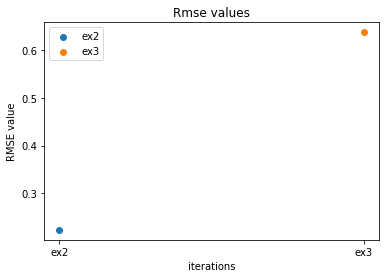

In [71]:
# To plot the RMSE values obtained for the test set in ex2 and ex3


plt.ylabel('RMSE value')

plt.xlabel('iterations')
plt.title('Rmse values')

plt.scatter("ex2",np.mean(rmse_test),label="ex2")


plt.scatter("ex3",rmse_test_mf, label="ex3")
plt.legend()
plt.show()

We see that the rmse value obtained on test set for ex 2 is very much less than that obtained using NMF. Thus I conclude that the sklearn library used is not as efficient. Maybe there are better libraries?... could not find any other explanation.

References:

    https://stackoverflow.com/questions/33217636/mean-calculation-in-pandas-excluding-zeros
    https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    https://pbpython.com/pandas-qcut-cut.html
    https://github.com/nicolasfguillaume/Recommender-Systems-Making-Movies-Recommendation/blob/master/MovieLens%20(NMF)%20v1.ipynb
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
    